In [ ]:
%pip install yfinance


# Import libraries 

In [78]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from class_definition import Stocks
# Use yf over pdr
#yf.pdr_override()

# Retrive data

For each stock we get data from Yahoo Finance based on tickers provided in a list.

## Stock pick

We choose energy sector stocks from S&P 500 as it is known that they have been highly correlated in the past. We picked 10 stocks with highest market cap in this sector. 

**STOCK LIST:**
- Exxon Mobil Corporation [XOM]
- Chevron Corporation [CVX]
- ConocoPhillips [COP]
- Schlumberger Limited [SLB]
- EOG Resources, Inc. [EOG]
- Marathon Petroleum Corporation [MPC]
- Phillips 66 [PSX]
- Enterprise Products Partners L.P. [EPD]
- Pioneer Natural Resources Company [PXD]
- Occidental Petroleum Corporation [OXY]




# Hourly data

In [67]:
# Companies tickers list
ticker_list=['XOM', 'CVX', 'COP' , 'SLB', 'EOG','MPC', 'PSX', 'EPD', 'PXD', 'OXY']

# Create an instance the object
#stocks = Stocks()

df_hourly = yf.download(ticker_list, period="730d", interval="1h")['Adj Close']


[*********************100%%**********************]  10 of 10 completed


In [ ]:
plt.figure(figsize=(12, 6))
for ticker in ticker_list:
    plt.plot(df_hourly.index, df_hourly[ticker], label=ticker)

plt.title('Adjusted Close Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [64]:
# Count NaN values in each column
nan_counts_hourly = df_hourly.isna().sum()

# Display the result
print(nan_counts_hourly)

Ticker
COP     0
CVX     0
EOG    22
EPD     0
MPC     0
OXY     0
PSX     0
PXD     0
SLB    70
XOM     0
dtype: int64


In [68]:
# lets check what is maximum number of cosencutive NaN values
# If there is only a few we can decide to interpolate data with back fill for example to get missing data

def max_consecutive_nan(column):
    max_consecutive = 0
    current_consecutive = 0

    for value in column:
        if pd.isna(value):
            current_consecutive += 1
            max_consecutive = max(max_consecutive, current_consecutive)
        else:
            current_consecutive = 0

    return max_consecutive

# Calculate max consecutive NaN values in each column
max_nan_values = df_hourly.apply(max_consecutive_nan)

# Display the result
print(max_nan_values)

Ticker
COP    0
CVX    0
EOG    7
EPD    0
MPC    0
OXY    0
PSX    0
PXD    0
SLB    7
XOM    0
dtype: int64


In [73]:
df_filled_hourly = df_hourly.fillna(method='ffill')

/var/folders/v6/6lgngf0x7vq9rcmn59rgh0tc0000gn/T/ipykernel_99770/2194419666.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [75]:
fig = px.line(df_filled_hourly, x=df_filled_hourly.index, y=ticker_list, labels={'value': 'Adjusted Close Price', 'variable': 'Ticker'})
fig.update_layout(title='Adjusted Hourly Close Prices of Selected Stocks',
                  xaxis_title='Date',
                  yaxis_title='Adjusted Close Price')

# Show the interactive plot
fig.show()

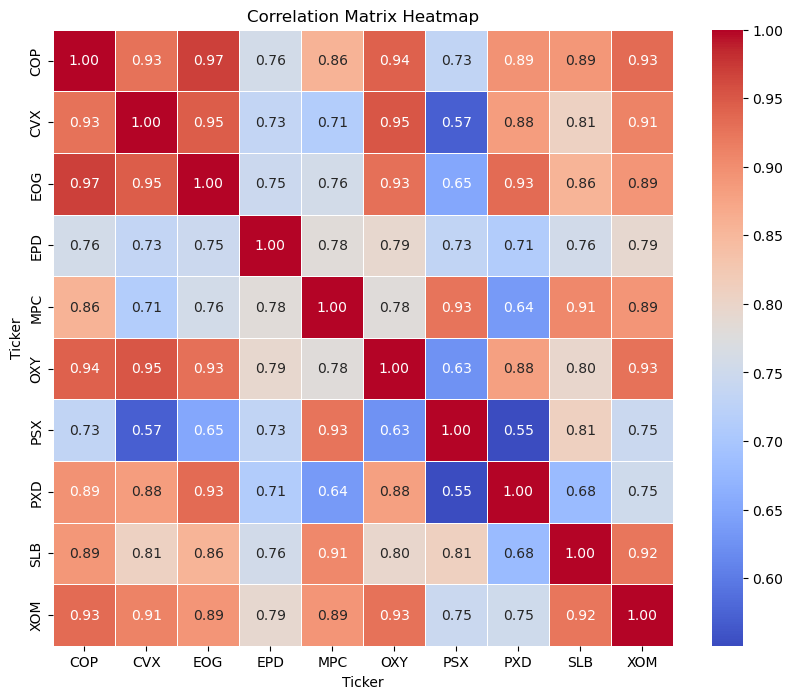

In [79]:
corr_matrix_hourly = df_filled_hourly.corr()

# plot correlation matric heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_hourly, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Daily data

In [38]:
# Set analyzed period
start_date="2000-01-01"
end_date="2023-12-31"

#get data from yahoo finance
df_daily = yf.download(ticker_list, start=start_date, end=end_date, interval="1d")['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [39]:
fig1 = px.line(df_daily, x=df_daily.index, y=ticker_list, labels={'value': 'Adjusted Close Price', 'variable': 'Ticker'})
fig1.update_layout(title='Adjusted Daily Close Prices of Selected Stocks',
                  xaxis_title='Date',
                  yaxis_title='Adjusted Close Price')

# Show the interactive plot
fig1.show()

In [44]:
#explore dataframe
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COP     6037 non-null   float64
 1   CVX     6037 non-null   float64
 2   EOG     6037 non-null   float64
 3   EPD     6037 non-null   float64
 4   MPC     3150 non-null   float64
 5   OXY     6037 non-null   float64
 6   PSX     2949 non-null   float64
 7   PXD     6037 non-null   float64
 8   SLB     6037 non-null   float64
 9   XOM     6037 non-null   float64
dtypes: float64(10)
memory usage: 518.8 KB


In [50]:
# Count NaN values in each column
nan_counts = df_daily.isna().sum()

# Display the result
print(nan_counts)

Ticker
COP       0
CVX       0
EOG       0
EPD       0
MPC    2887
OXY       0
PSX    3088
PXD       0
SLB       0
XOM       0
dtype: int64


In [53]:
#Drop columns of MPC and PSX

df_daily = df_daily.drop(columns=['MPC', 'PSX'])

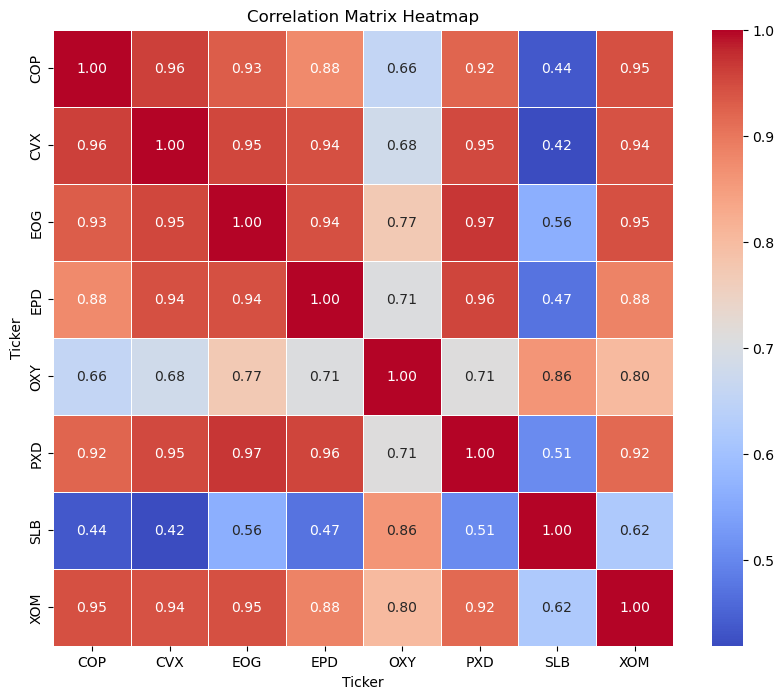

In [81]:
corr_matrix_daily = df_daily.corr()

# plot correlation matric heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_daily, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()